# 1. Package import and Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [65]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.26.4
2.1.4
0.13.1
1.3.2


In [ ]:
# df = pd.read_excel(r'C:\Users\Utente\Downloads\VRSREC Lessons 2024\Project 1\oasis_longitudinal_demographics.xlsx')
# df.head()

In [ ]:
# we can load the data in two ways

# (1). Just upload the file in jupyter and define the name
# (2). If it is in pc just r 'give the file path'

In [25]:
import pandas as pd
df = pd.read_excel(r'/content/oasis_longitudinal_demographics-8d83e569fa2e2d30.xlsx')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


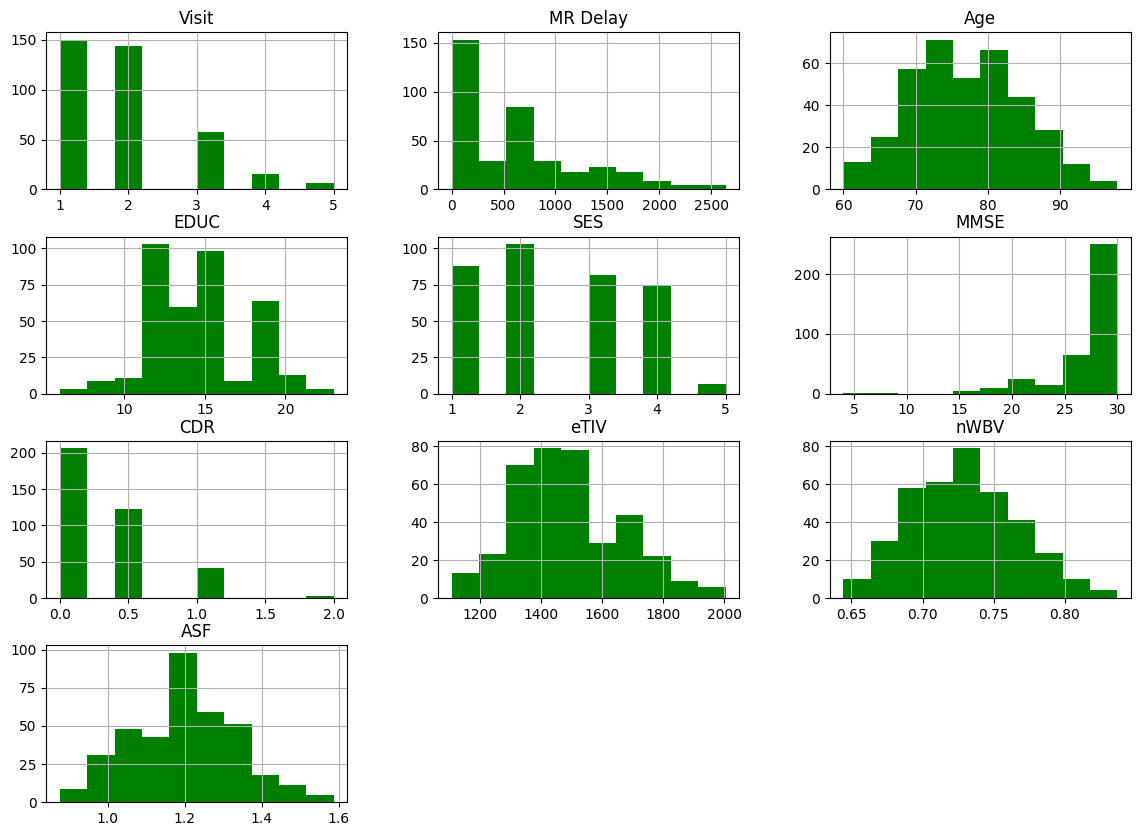

In [26]:
df.hist(figsize = (14,10), color = 'g')
plt.show()

In [29]:
import pandas as pd

# Assuming 'Subject ID' is the non-numerical column causing the issue
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numerical subset
corr = numerical_df.corr()
print(corr)

             Visit  MR Delay       Age      EDUC       SES      MMSE  \
Visit     1.000000  0.920009  0.183213  0.024615 -0.051622 -0.029078   
MR Delay  0.920009  1.000000  0.205357  0.051630 -0.030813  0.065844   
Age       0.183213  0.205357  1.000000 -0.027886 -0.046857  0.055612   
EDUC      0.024615  0.051630 -0.027886  1.000000 -0.722647  0.194884   
SES      -0.051622 -0.030813 -0.046857 -0.722647  1.000000 -0.149219   
MMSE     -0.029078  0.065844  0.055612  0.194884 -0.149219  1.000000   
CDR       0.002325 -0.062915 -0.026257 -0.153121  0.076160 -0.686519   
eTIV      0.117423  0.119641  0.042401  0.257042 -0.261582 -0.032088   
nWBV     -0.125826 -0.104737 -0.518546 -0.012300  0.089956  0.341912   
ASF      -0.120439 -0.123615 -0.034845 -0.241696  0.255448  0.040145   

               CDR      eTIV      nWBV       ASF  
Visit     0.002325  0.117423 -0.125826 -0.120439  
MR Delay -0.062915  0.119641 -0.104737 -0.123615  
Age      -0.026257  0.042401 -0.518546 -0.034845  
EDU

<Axes: >

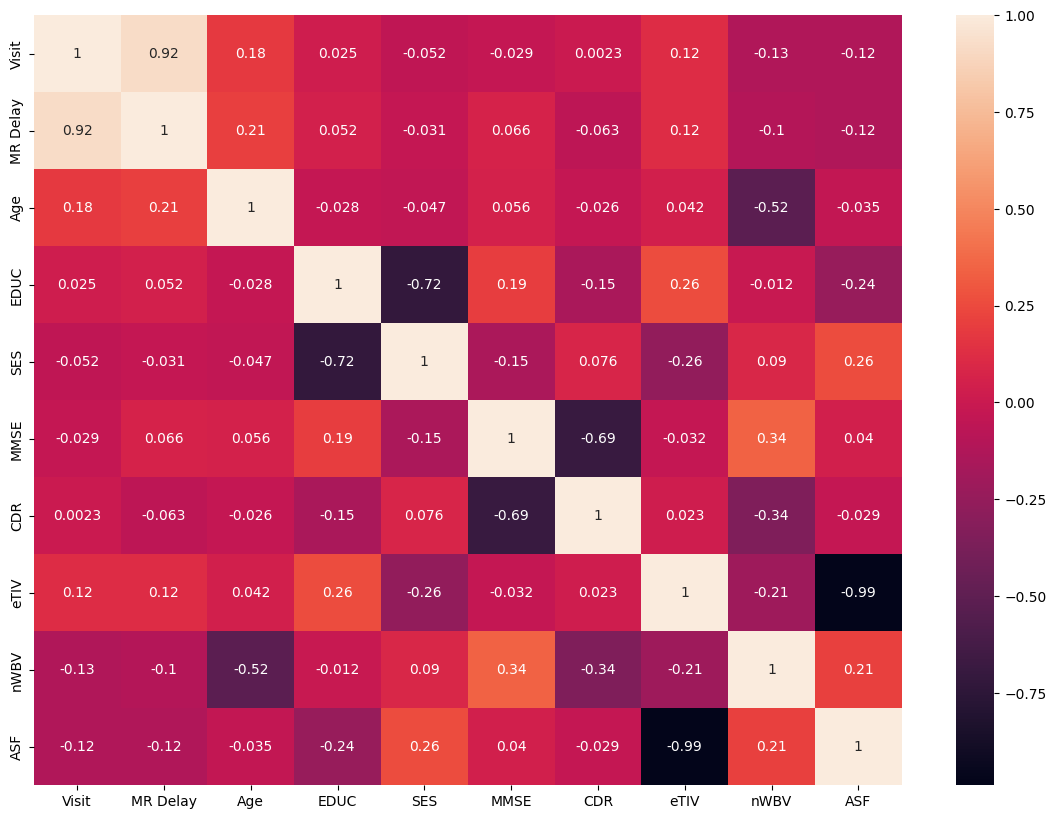

In [30]:
plt.figure(figsize = (14,10))
sns.heatmap(corr, annot = True)

# 2. Data preprocessing

In [31]:
print(df.isnull().sum())

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [32]:
df['SES'].value_counts()

,count
SES,
2.0,103
1.0,88
3.0,82
4.0,74
5.0,7


In [33]:
df['MMSE'].value_counts()

,count
MMSE,
30.0,114
29.0,91
28.0,45
27.0,32
26.0,20
25.0,12
21.0,11
23.0,11
22.0,7


In [34]:
df['SES'].value_counts().idxmax()

2.0

In [35]:
df['SES'].value_counts().idxmin()

5.0

In [36]:
df['SES'].fillna(2.0, inplace = True)

In [37]:
df['MMSE'].fillna(30, inplace = True)

In [38]:
print(df.isnull().sum())

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


In [39]:
df['M/F'] = df['M/F'].replace(['M', 'F'], [1,0])
df['Hand'] = df['Hand'].replace(['L', 'R'], [1,0])
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,0,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,0,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,0,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,0,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,0,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


In [40]:
df['Group'] = df['Group'].replace(['Converted'],['Demented'])
df['Group'] = df['Group'].replace(['Nondemented', 'Demented'], [0,1])
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,0,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,0,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,0,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,0,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


# 3. Train and Test split

In [41]:
# Defining data
y_data = df['Group']
y_data[:5]

,Group
0,0
1,0
2,1
3,1
4,1


In [42]:
X_data = df.drop(['MRI ID', 'Subject ID', 'Group'], axis = 1)
X_data.head()

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,0,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,2,457,1,0,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,1,0,1,0,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,2,560,1,0,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,3,1895,1,0,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2)
print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

# dataset consists 373 samples (20%) (80%)

Train data: (298, 12) (298,)
Test data: (75, 12) (75,)


In [44]:
# For Data normalization, I am using standardization
from sklearn.preprocessing import StandardScaler
X_data = StandardScaler().fit(X_data).transform(X_data)
X_data [:5]

array([[-0.95706686, -0.93771494,  1.15379808,  0.        ,  1.30873772,
        -0.20813199, -0.3944662 , -0.09706416, -0.77765291,  2.83359462,
        -0.90181966, -2.26232493],
       [ 0.12799678, -0.21761337,  1.15379808,  0.        ,  1.43978716,
        -0.20813199, -0.3944662 ,  0.71958842, -0.77765291,  2.93552502,
        -1.30741435, -2.31961167],
       [-0.95706686, -0.93771494,  1.15379808,  0.        , -0.26385558,
        -0.90439416, -0.3944662 , -1.18593426,  0.55905002,  1.08111854,
         0.18280374, -1.08577527],
       [ 0.12799678, -0.05531476,  1.15379808,  0.        , -0.13280614,
        -0.90439416, -0.3944662 ,  0.17515337,  0.55905002,  1.41841305,
        -0.43550978, -1.34469305],
       [ 1.21306043,  2.04826424,  1.15379808,  0.        ,  0.39139163,
        -0.90439416, -0.3944662 , -1.45815179,  0.55905002,  1.19266583,
        -0.76351198, -1.17341289]])

# 4. Machine learning model development

## Descion Trees

Decision Tree accuracy is :  82.66666666666667
DT classfication report :
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.77      0.84      0.81        32

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.82        75
weighted avg       0.83      0.83      0.83        75

Decision Tree confusion matrix is : 
 [[35  8]
 [ 5 27]]


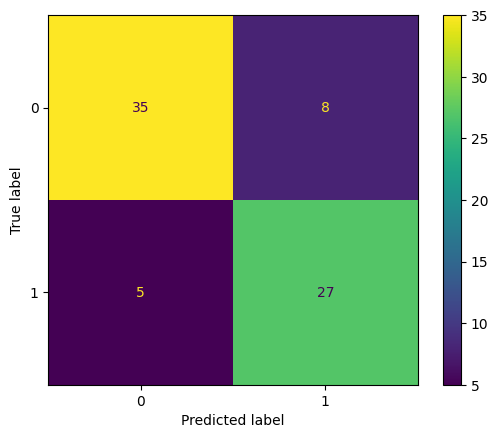

Decision Tree precsion is :  0.7714285714285715


In [45]:
# Importing necessary packages
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score
import seaborn as sns

# define the ML classifier
DT = tree.DecisionTreeClassifier()
DT

# Model fitting
DT.fit(X_train, y_train)

# Model predictions
y_pred=DT.predict(X_test)

DT_accuracy=accuracy_score(y_test,y_pred)*100
print("Decision Tree accuracy is : ",DT_accuracy)

DT_classification_report=classification_report(y_test,y_pred)
print("DT classfication report :\n", DT_classification_report)

DT_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Decision Tree confusion matrix is : \n", DT_confusion_matrix)

cm_visulization = ConfusionMatrixDisplay(DT_confusion_matrix)
cm_visulization.plot()
plt.show()

DT_precision=precision_score(y_test,y_pred)
print("Decision Tree precsion is : ",DT_precision)

## Support vector machines`

Support vector machine accuracy is :  90.66666666666666
SVM classfication report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.96      0.81      0.88        32

    accuracy                           0.91        75
   macro avg       0.92      0.89      0.90        75
weighted avg       0.91      0.91      0.91        75

SVM confusion matrix is : 
 [[42  1]
 [ 6 26]]


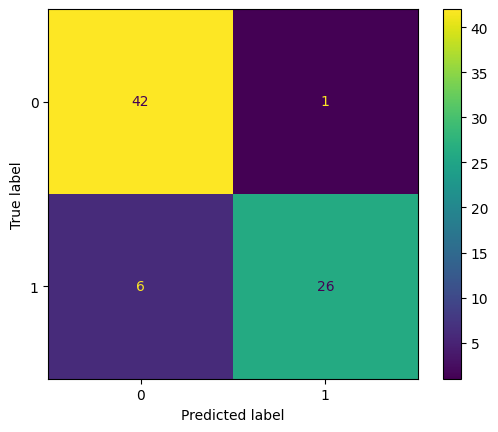

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# define the ML classifier

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='scale')

# Model fitting

SVM.fit(X_train, y_train)

# Model predictions
y_pred = SVM.predict(X_test)

SVM_accuracy = accuracy_score(y_test, y_pred)*100
print("Support vector machine accuracy is : ", SVM_accuracy)

SVM_classification_report = classification_report(y_test, y_pred)
print("SVM classfication report : \n", SVM_classification_report)


SVM_confusion_matrix = confusion_matrix(y_test, y_pred)
print("SVM confusion matrix is : \n", SVM_confusion_matrix)

cm_visulization = ConfusionMatrixDisplay(SVM_confusion_matrix)
cm_visulization.plot()
plt.show()

## 4.3 Random Forest

RF accuracy is :  90.66666666666666
RF classfication report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.93      0.84      0.89        32

    accuracy                           0.91        75
   macro avg       0.91      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75

RF confusion matrix is : 
 [[41  2]
 [ 5 27]]


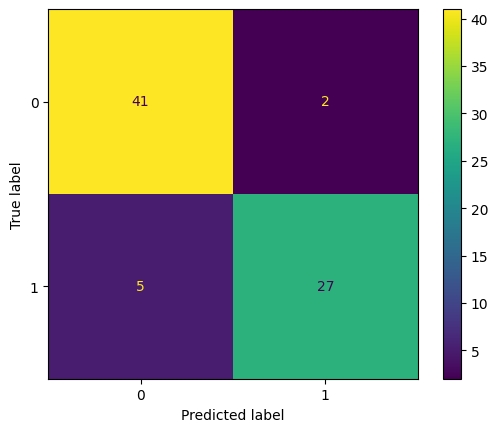

In [47]:
# Importing necessary packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# define the ML classifier

RF = RandomForestClassifier()

# Model fitting

RF.fit(X_train, y_train)

# Model predictions
y_pred = RF.predict(X_test)

RF_accuracy = accuracy_score(y_test, y_pred)*100
print("RF accuracy is : ", RF_accuracy)

RF_classification_report = classification_report(y_test, y_pred)
print("RF classfication report : \n", RF_classification_report)


RF_confusion_matrix = confusion_matrix(y_test, y_pred)
print("RF confusion matrix is : \n", RF_confusion_matrix)

cm_visulization = ConfusionMatrixDisplay(RF_confusion_matrix)
cm_visulization.plot()
plt.show()

## 4.4. Logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR accuracy is :  88.0
LR classfication report : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.90      0.81      0.85        32

    accuracy                           0.88        75
   macro avg       0.88      0.87      0.88        75
weighted avg       0.88      0.88      0.88        75

RF confusion matrix is : 
 [[40  3]
 [ 6 26]]


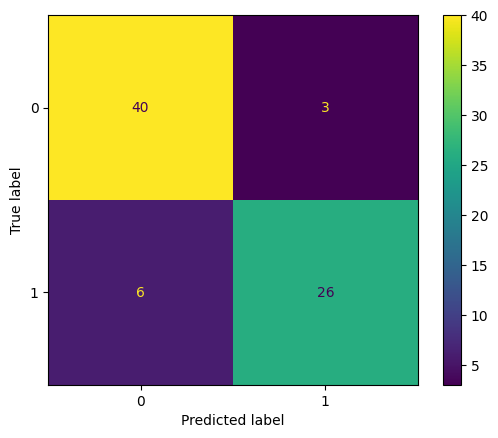

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# define the ML classifier

LR = LogisticRegression()

# Model fitting

LR.fit(X_train, y_train)

# Model predictions
y_pred = LR.predict(X_test)

LR_accuracy = accuracy_score(y_test, y_pred)*100
print("LR accuracy is : ", LR_accuracy)

LR_classification_report = classification_report(y_test, y_pred)
print("LR classfication report : \n", LR_classification_report)


LR_confusion_matrix = confusion_matrix(y_test, y_pred)
print("RF confusion matrix is : \n", LR_confusion_matrix)

cm_visulization = ConfusionMatrixDisplay(LR_confusion_matrix)
cm_visulization.plot()
plt.show()

## 4.5. Naïve Bayes model

GNB accuracy is :  89.33333333333333
GNB classfication report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.93      0.81      0.87        32

    accuracy                           0.89        75
   macro avg       0.90      0.88      0.89        75
weighted avg       0.90      0.89      0.89        75

GNB confusion matrix is : 
 [[41  2]
 [ 6 26]]


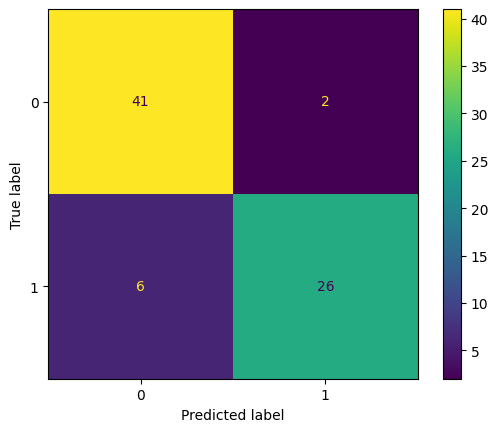

In [49]:
# Importing necessary packages

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# define the ML classifier

GNB = GaussianNB()

# Model fitting

GNB.fit(X_train, y_train)

# Model predictions
y_pred = GNB.predict(X_test)

GNB_accuracy = accuracy_score(y_test, y_pred)*100
print("GNB accuracy is : ", GNB_accuracy)

GNB_classification_report = classification_report(y_test, y_pred)
print("GNB classfication report : \n", GNB_classification_report)


GNB_confusion_matrix = confusion_matrix(y_test, y_pred)
print("GNB confusion matrix is : \n", GNB_confusion_matrix)

cm_visulization = ConfusionMatrixDisplay(GNB_confusion_matrix)
cm_visulization.plot()
plt.show()

## 4.6. Neural networks

MLP accuracy is :  66.66666666666666
MLP classfication report : 
               precision    recall  f1-score   support

           0       0.65      0.93      0.76        43
           1       0.77      0.31      0.44        32

    accuracy                           0.67        75
   macro avg       0.71      0.62      0.60        75
weighted avg       0.70      0.67      0.63        75

MLP confusion matrix is : 
 [[40  3]
 [22 10]]


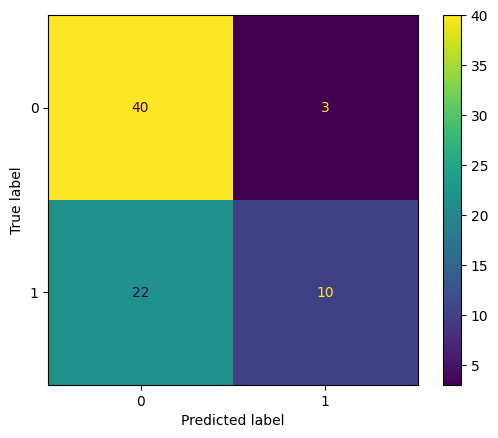

In [50]:
# Importing necessary packages

from sklearn.neural_network import MLPClassifier

# MLP = Multilayer percerptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# define the ML classifier

MLP = MLPClassifier()

# Model fitting

MLP.fit(X_train, y_train)

# Model predictions
y_pred = MLP.predict(X_test)

MLP_accuracy = accuracy_score(y_test, y_pred)*100
print("MLP accuracy is : ", MLP_accuracy)

MLP_classification_report = classification_report(y_test, y_pred)
print("MLP classfication report : \n", MLP_classification_report)


MLP_confusion_matrix = confusion_matrix(y_test, y_pred)
print("MLP confusion matrix is : \n", MLP_confusion_matrix)

cm_visulization = ConfusionMatrixDisplay(MLP_confusion_matrix)
cm_visulization.plot()
plt.show()

###### ROC Curve
receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR), at various threshold settings.




![image-2.png](attachment:image-2.png)

LR ROC Score is:  0.8968023255813954


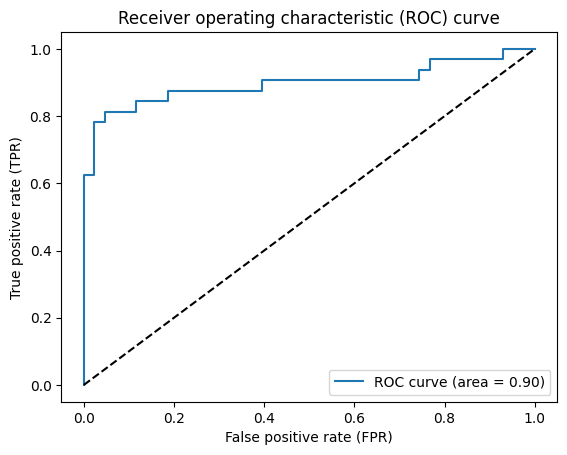

In [51]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

LR_roc_auc_score = roc_auc_score(y_test, LR.predict_proba(X_test) [: , 1])
# LR_roc_auc_score = roc_auc_score(y_test, y_pred)
print("LR ROC Score is: ", LR_roc_auc_score)

fpr,tpr,threshoulds = roc_curve (y_test, LR.predict_proba(X_test) [: , 1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], 'k--')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

DT ROC Score is:  0.8288517441860466


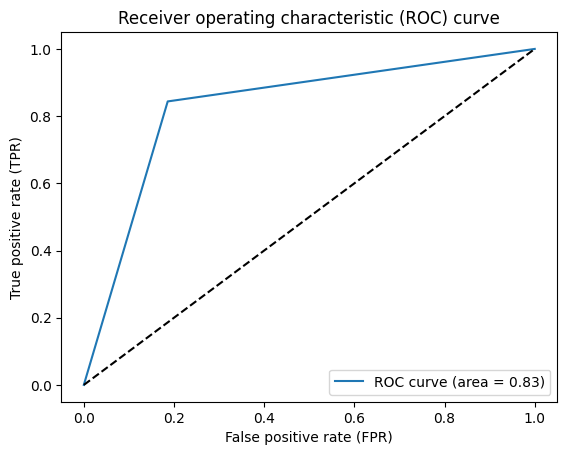

In [52]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

DT_roc_auc_score = roc_auc_score(y_test, DT.predict_proba(X_test) [: , 1])
print("DT ROC Score is: ", DT_roc_auc_score)

fpr,tpr,threshoulds = roc_curve (y_test, DT.predict_proba(X_test) [: , 1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], 'k--')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

SVM ROC Score is:  0.4349563953488372


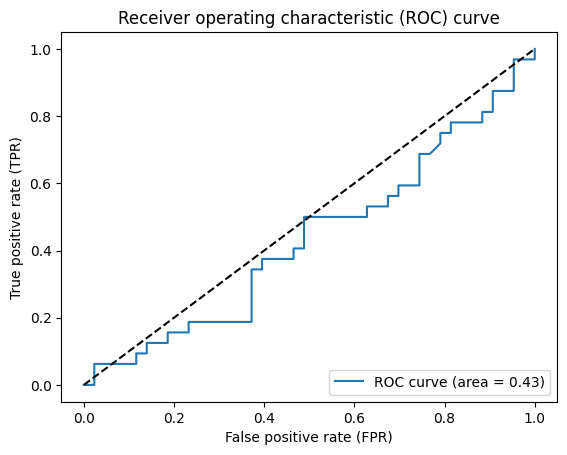

In [53]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

SVM = SVC(probability=True)

SVM.fit(X_train, y_train)

SVM_roc_auc_score = roc_auc_score(y_test, SVM.predict_proba(X_test) [: , 1])
print("SVM ROC Score is: ", SVM_roc_auc_score)

fpr,tpr,threshoulds = roc_curve (y_test, SVM.predict_proba(X_test) [: , 1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], 'k--')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

RF ROC Score is:  0.8968023255813954


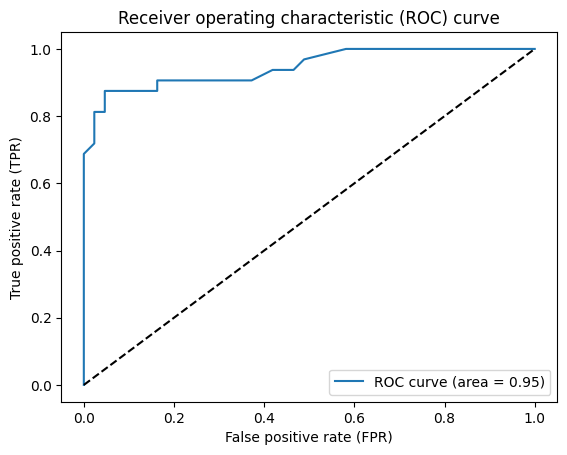

In [54]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

RF_roc_auc_score = roc_auc_score(y_test, RF.predict_proba(X_test) [: , 1])
print("RF ROC Score is: ", LR_roc_auc_score)

fpr,tpr,threshoulds = roc_curve (y_test, RF.predict_proba(X_test) [: , 1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], 'k--')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

GNB ROC Score is:  0.9513081395348837


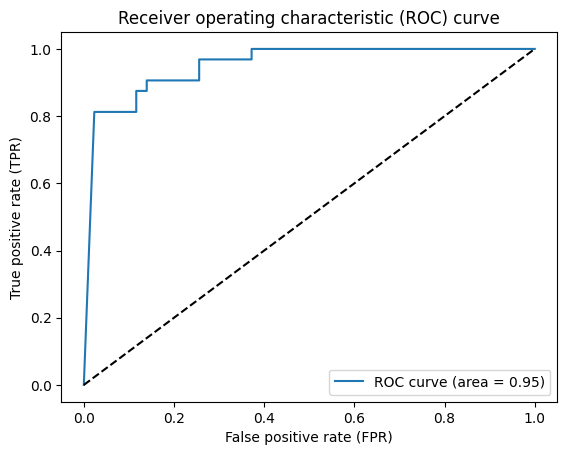

In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

GNB_roc_auc_score = roc_auc_score(y_test, GNB.predict_proba(X_test) [: , 1])
print("GNB ROC Score is: ", GNB_roc_auc_score)

fpr,tpr,threshoulds = roc_curve (y_test, GNB.predict_proba(X_test) [: , 1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], 'k--')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

MLP ROC Score is:  0.7289244186046512


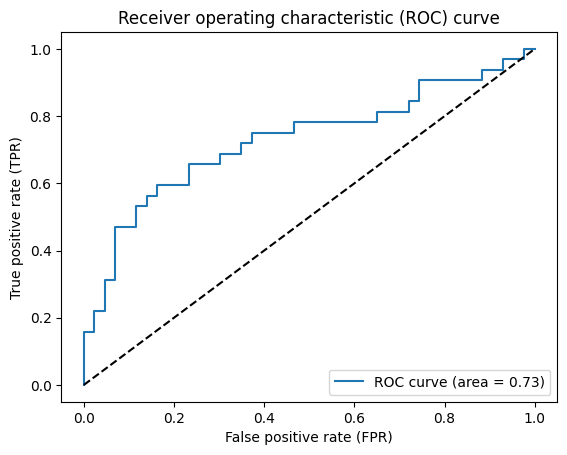

In [56]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

MLP_roc_auc_score = roc_auc_score(y_test, MLP.predict_proba(X_test) [: , 1])
print("MLP ROC Score is: ", MLP_roc_auc_score)

fpr,tpr,threshoulds = roc_curve (y_test, MLP.predict_proba(X_test) [: , 1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], 'k--')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

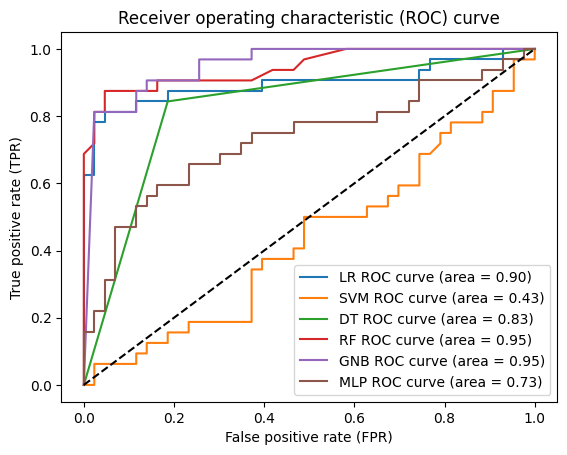

In [57]:
classifiers = [LR , SVM , DT , RF , GNB , MLP]    # these are defined classifiers
labels = ['LR' , 'SVM' , 'DT' , 'RF' , 'GNB' , 'MLP']

plt.figure()

for clf,label in zip (classifiers, labels):
    fpr,tpr,threshoulds = roc_curve (y_test, clf.predict_proba(X_test) [: , 1])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr, label='%s ROC curve (area = %0.2f)'%(label, roc_auc))


plt.plot([0,1], 'k--')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

In [62]:
import pickle # Import the pickle module

with open('model.pkl','wb') as file:
    pickle.dump(LR,file)